In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [2]:
# Load data
df = pd.read_csv("/Users/mariahloehr/IICD/IICD/Data/cell_cycle_tidied.csv")

# Separate features and target
X = df.drop(columns=['phase', 'age', 'PHATE_1', 'PHATE_2'])  # drop non-feature columns
y = df['age']

feature_names = X.columns.tolist()
X = X.to_numpy()
y = y.to_numpy()

In [3]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=949)

LOCO

In [4]:
import sys
sys.path.append("/Users/mariahloehr/IICD/IICD/feature_importance")

In [5]:
import locomp
from locomp import *
from locomp.MLmodels import *
import itertools
import importlib
from sklearn.base import BaseEstimator, RegressorMixin, clone
import itertools
from functools import partial
import multiprocessing as mp
import re

In [10]:
# define fit_func
def lasso(X,Y,X1):
    clf = Lasso(fit_intercept = False, alpha =0.01, random_state=949, max_iter = 10000).fit(X, Y)    
    return clf.predict(X1)

In [11]:
J1 = 0
J2 = 1
m_ratio = 0.2
n_ratio = 0.2
B = 5000
fit_func = lasso

In [12]:
x=LOCOMPReg(X_train,y_train,n_ratio,m_ratio,B,fit_func, selected_features=[],alpha=0.1,bonf=False)
x.run_loco()

In [13]:
x.loco_ci

array([[ 5.74059202e-01,  8.51881596e-01, -1.69731169e-03,
         1.35124941e-03, -1.73031141e-04],
       [ 3.69213213e-01,  7.38426426e-01, -3.66721239e-03,
         5.53555700e-03,  9.34172305e-04],
       [ 4.37784129e-01,  8.75568257e-01, -1.42585181e-03,
         1.72589756e-03,  1.50022876e-04],
       ...,
       [ 5.50357775e-01,  8.99284449e-01, -1.05303656e-03,
         9.02560687e-04, -7.52379365e-05],
       [ 3.13260239e-01,  6.26520479e-01, -5.99872534e-04,
         1.10394802e-03,  2.52037743e-04],
       [ 3.86942145e-01,  7.73884291e-01, -7.82546560e-04,
         1.11376524e-03,  1.65609341e-04]], shape=(262, 5))

In [14]:
ci_df = pd.DataFrame(x.loco_ci)
ci_df = ci_df.rename(columns={2: 'lower_bound', 3: 'upper_bound', 4: 'score'})
ci_df['feature_name'] = feature_names
fig_df = ci_df.nlargest(10, "score")

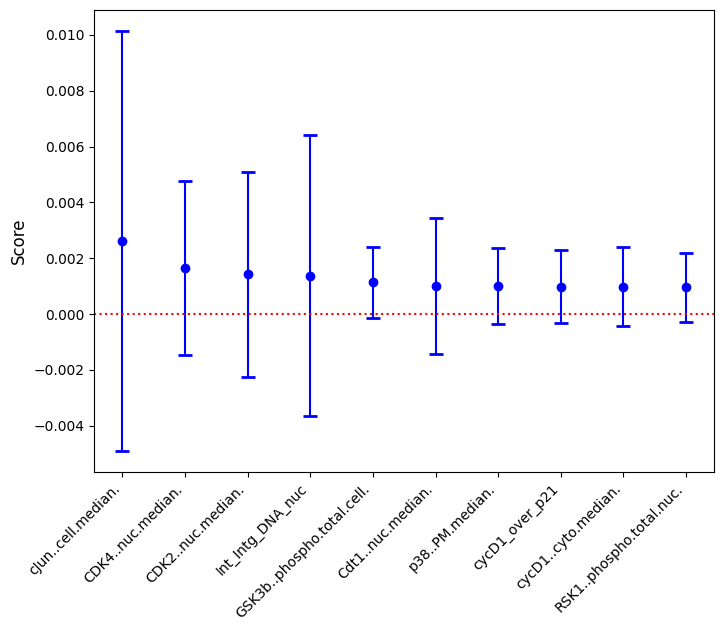

In [15]:
# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(
    fig_df["feature_name"], fig_df["score"],
    yerr=[fig_df["score"] - fig_df["lower_bound"], fig_df["upper_bound"] - fig_df["score"]],
    fmt="o", capsize=5, capthick=2, markersize=6, color="b"
)
plt.axhline(y=0, color='r', linestyle='dotted')
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha = 'right')
plt.show()